In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv('C:/Users/Hp/Desktop/Python/TGC/Utkarsh Sir/Datasets/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

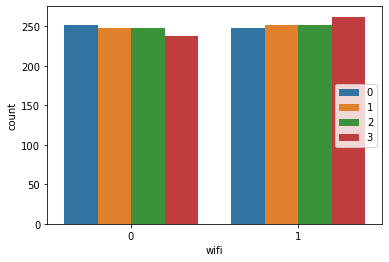

In [8]:
sns.countplot(x=df['wifi'],hue=df['price_range'])
plt.legend(loc=5)
plt.show()

In [9]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

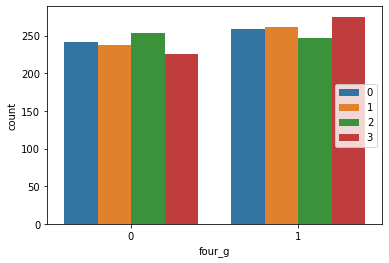

In [10]:
sns.countplot(x=df['four_g'],hue=df['price_range'])
plt.legend(loc=5)
plt.show()

In [11]:
df.groupby(['four_g','price_range'])['price_range'].count()

four_g  price_range
0       0              241
        1              238
        2              253
        3              225
1       0              259
        1              262
        2              247
        3              275
Name: price_range, dtype: int64

In [12]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
x.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [15]:
y.head(3)

0    1
1    2
2    2
Name: price_range, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### DT Classifier

In [19]:
m1 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=10)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10)

In [20]:
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))

Training score 0.952
Testing score 0.85


In [21]:
ypred_m1 = m1.predict(x_test)

In [22]:
cm1 = confusion_matrix(y_test,ypred_m1)
print(cm1)
print(classification_report(y_test,ypred_m1))

[[122  12   0   0]
 [  9  92  14   0]
 [  0  18  84  13]
 [  0   1   8 127]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       134
           1       0.75      0.80      0.77       115
           2       0.79      0.73      0.76       115
           3       0.91      0.93      0.92       136

    accuracy                           0.85       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.85      0.85      0.85       500



### Class Based Model

#### Create different models

In [23]:
dt1  = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=10)
rf1  = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=7)
gnb1 = GaussianNB()
svm1 = SVC(kernel='linear',C=1)

In [24]:
class Build:
    def __init__(self,mname,model):
        self.mname = mname
        self.model = model
        print(f'{self.mname} is Instantiated')
    
    def process(self):
        self.model.fit(x_train,y_train)
        self.ypred = self.model.predict(x_test)
        self.train_sc = self.model.score(x_train,y_train)
        self.test_sc = self.model.score(x_test,y_test)
        self.cm = confusion_matrix(y_test,self.ypred)
        self.cr = classification_report(y_test,self.ypred)
        print(f'Training score for {self.mname} is {self.train_sc}')
        print(f'Testing score for {self.mname} is {self.test_sc}')
        print(f'Predicted value for {self.mname} is \n {self.ypred}')
        print(f'Confusion Matrix for {self.mname} is \n{self.cm}')
        print(f'Classification Report for {self.mname} is \n{self.cr}')
        

b = Build('RF',rf1)
b.process()

RF is Instantiated
Training score for RF is 0.9773333333333334
Testing score for RF is 0.852
Predicted value for RF is 
 [0 3 0 3 2 3 0 2 2 1 2 2 3 0 1 3 3 1 1 2 3 2 0 0 2 0 1 0 0 2 2 1 1 1 3 0 1
 2 2 2 1 2 2 0 2 2 2 1 0 2 3 0 0 1 3 3 3 2 3 1 1 1 2 0 0 0 0 1 0 3 0 3 1 3
 3 0 3 1 2 0 3 2 3 2 2 0 3 0 0 2 3 1 3 2 2 3 0 1 0 1 0 2 3 0 3 0 1 1 0 0 2
 3 3 0 0 2 0 0 3 2 3 2 1 3 2 0 3 2 1 0 1 0 2 2 3 2 2 3 1 2 3 2 3 2 1 0 2 1
 3 2 0 0 2 0 3 2 3 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 1 3 0 1 3 2 2 3 1 0 1
 1 2 1 3 0 3 2 0 2 3 0 0 3 1 1 0 0 0 0 1 3 0 3 0 3 3 1 1 3 1 3 2 3 2 0 1 1
 0 1 1 2 2 1 1 2 3 0 2 0 3 0 2 2 3 1 2 0 2 1 0 1 3 3 1 1 3 3 0 1 3 3 0 3 3
 0 3 0 2 0 0 3 3 3 0 0 0 3 0 1 2 1 2 0 0 1 1 2 0 1 1 1 0 3 3 1 0 3 2 2 1 2
 0 3 1 1 0 1 1 2 2 2 1 0 3 3 3 3 0 0 2 2 0 2 0 1 2 1 2 1 2 3 2 2 0 0 0 1 1
 0 3 0 0 1 1 0 2 0 2 3 3 3 0 3 0 1 2 1 3 3 1 1 1 0 0 0 0 1 1 3 2 3 2 0 2 3
 0 1 1 3 2 2 3 1 1 3 0 3 3 0 3 3 0 3 3 0 0 0 0 3 0 0 2 1 0 2 1 3 1 0 2 2 3
 1 0 2 2 1 3 1 2 2 3 0 1 1 0 0 2 2 0 3 1 0 0 3 1 3 0 0

In [25]:
b1 = Build('DT',dt1)
b1.process()

DT is Instantiated
Training score for DT is 0.952
Testing score for DT is 0.848
Predicted value for DT is 
 [0 3 0 3 1 3 0 2 3 1 3 3 3 0 1 1 3 2 1 2 2 2 0 0 2 0 1 0 0 2 2 1 1 1 3 0 2
 2 3 2 1 2 2 0 2 2 2 0 0 1 3 0 0 1 3 3 3 3 3 2 1 1 2 0 0 0 0 1 0 3 0 3 1 3
 3 0 3 1 2 1 3 2 3 2 2 0 3 0 0 2 3 1 3 1 2 3 0 2 0 2 0 2 3 1 3 0 1 2 0 1 2
 3 3 0 0 2 0 0 3 3 3 2 1 3 2 0 3 2 1 0 1 0 2 2 3 2 1 3 2 2 3 2 3 3 1 0 2 1
 3 2 0 0 1 0 3 2 3 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 2 3 0 1 3 2 3 3 1 0 2
 1 2 1 3 0 3 2 0 2 3 0 0 3 1 1 0 0 0 0 1 3 0 3 0 3 3 1 1 3 1 3 2 2 3 0 2 1
 0 1 1 2 3 1 2 1 2 0 2 0 2 0 3 1 3 1 2 0 2 1 0 1 3 3 0 1 3 3 0 1 3 3 0 3 3
 0 3 1 2 0 0 3 3 3 0 0 0 3 0 1 3 1 2 0 0 1 1 2 0 1 1 1 0 3 2 2 0 3 1 2 1 3
 0 2 1 1 0 1 1 2 2 2 1 0 3 3 3 3 0 0 2 2 0 2 0 2 3 1 3 1 2 2 2 2 0 0 0 2 1
 0 3 0 0 1 1 0 1 1 3 3 3 3 0 3 1 1 3 1 3 3 1 1 1 0 0 0 0 0 1 3 2 3 1 0 1 3
 1 1 2 3 1 2 3 1 1 3 0 2 3 0 3 3 0 1 3 0 0 0 0 3 0 0 2 2 0 2 2 3 1 0 2 2 3
 2 0 2 2 1 3 1 2 2 3 0 1 1 0 1 2 2 0 3 1 0 0 3 1 3 0 0 1 3 3 3 3 1 

In [26]:
b2 = Build('GNB',gnb1)
b2.process()

GNB is Instantiated
Training score for GNB is 0.8106666666666666
Testing score for GNB is 0.804
Predicted value for GNB is 
 [0 3 0 3 2 3 0 1 3 0 2 2 3 1 1 2 3 1 1 2 2 2 0 0 2 0 1 0 0 2 2 1 1 1 2 0 1
 2 2 2 1 1 2 0 2 2 2 1 0 2 3 0 0 1 3 3 3 3 3 2 1 1 2 0 0 0 0 2 1 3 1 3 1 3
 3 0 3 1 2 0 2 2 3 2 2 0 3 0 0 2 3 1 3 1 2 3 0 1 0 1 0 3 3 0 3 0 1 1 0 0 2
 3 3 0 0 2 0 0 3 2 3 2 1 3 2 0 3 2 2 0 1 0 2 1 3 1 2 3 1 2 3 2 3 2 1 0 2 2
 3 2 0 0 2 0 3 2 2 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 2 3 0 2 3 2 3 3 1 0 1
 1 2 1 3 0 3 2 1 2 3 0 0 3 1 1 0 0 0 0 1 3 0 3 0 3 3 1 1 3 1 3 1 2 3 0 1 1
 0 1 1 2 2 1 1 2 3 0 2 0 3 0 3 2 3 1 2 0 2 1 0 1 3 3 0 1 3 3 1 1 3 3 0 2 3
 0 3 1 2 0 0 3 3 3 0 0 1 3 0 2 2 1 2 0 0 2 2 2 0 1 1 1 0 3 2 1 0 3 2 2 1 2
 0 3 1 1 0 1 2 2 2 2 1 0 3 3 3 3 0 1 2 1 0 2 0 1 3 1 2 1 2 3 2 2 0 0 0 1 2
 0 3 0 0 1 1 0 2 0 3 3 3 3 0 3 1 1 2 0 3 3 1 1 1 0 0 0 0 1 1 3 2 3 2 0 2 3
 0 2 1 3 2 2 3 1 1 3 0 3 3 0 3 3 1 2 3 0 0 0 0 3 0 0 2 1 1 2 1 3 1 0 2 2 3
 1 0 2 3 0 3 1 2 2 3 0 1 1 0 1 2 2 0 3 1 0 0 3 1 3

In [27]:
b3 = Build('SVC',svm1)
b3.process()

SVC is Instantiated
Training score for SVC is 0.9946666666666667
Testing score for SVC is 0.958
Predicted value for SVC is 
 [1 3 0 3 2 3 0 2 3 1 2 2 3 0 1 3 3 1 2 2 3 2 0 0 2 0 1 0 1 2 2 1 1 1 2 0 2
 2 2 2 2 2 2 0 2 2 2 1 0 2 2 0 0 1 3 3 3 2 3 1 1 1 2 0 0 1 0 1 1 3 0 3 1 3
 3 0 3 1 2 1 2 2 3 2 2 0 3 0 0 2 3 1 3 2 1 3 0 2 0 2 0 2 3 0 3 0 1 2 0 0 2
 3 3 0 1 2 0 0 3 3 3 2 1 3 2 0 3 1 1 0 1 0 2 2 3 2 1 3 2 2 3 2 3 3 1 0 2 1
 3 2 0 0 1 0 3 2 3 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 1 3 0 1 3 2 2 3 1 0 2
 1 2 1 3 0 3 2 0 2 3 1 0 3 1 1 0 0 0 0 1 3 0 3 0 3 3 1 1 3 1 3 2 3 3 0 1 1
 0 1 1 2 2 1 2 2 3 0 2 0 3 0 3 2 3 2 3 0 2 1 0 1 3 3 0 1 3 3 1 1 3 3 0 2 3
 0 3 1 2 0 0 3 3 3 0 0 0 3 0 1 2 1 2 0 0 2 1 2 0 0 1 1 0 3 2 1 0 3 1 2 1 2
 0 3 1 1 0 1 1 2 2 2 1 0 3 3 3 3 0 1 2 2 0 1 0 1 2 1 3 2 2 2 2 2 0 0 0 2 1
 0 3 0 0 0 1 0 2 1 2 3 3 3 0 3 1 1 3 1 3 3 1 1 0 0 0 0 0 1 1 3 2 3 1 0 1 3
 0 1 2 3 2 2 3 2 1 3 0 2 3 0 3 3 0 2 3 0 0 0 0 3 0 0 2 2 0 2 1 3 1 0 2 2 3
 1 0 2 2 0 3 1 2 2 3 0 1 1 0 1 2 2 0 3 1 0 1 3 1 3

In [28]:
svm1 = SVC(kernel='linear',C=1)

### Fit the model on entire dataset

In [29]:
x.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [30]:
y.head(3)

0    1
1    2
2    2
Name: price_range, dtype: int64

In [33]:
test_df = pd.read_csv('C:/Users/Hp/Desktop/Python/TGC/Utkarsh Sir/Datasets/test.csv')
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [34]:
test_df.shape

(1000, 21)

In [35]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [36]:
print(test_df.columns)
print(len(test_df.columns))

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
21


In [37]:
test_df.drop('id',axis=1,inplace=True)

In [38]:
print(test_df.columns)
print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [39]:
class Build2:
    def __init__(self,mname,model):
        self.mname = mname
        self.model = model
        print(f'{self.mname} is Instantiated')
    
    def process(self,xout):
        self.model.fit(x,y)
        self.ypred = self.model.predict(xout)
#         print(f'Predicted value for {self.mname} is \n {self.ypred}')
        return self.ypred

        
m2 = Build2('SVM',svm1)

SVM is Instantiated


In [40]:
ypred_test_df = m2.process(test_df)
ypred_test_df

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [41]:
print(len(ypred_test_df))

1000


In [42]:
test_df['Pred_Price_Range'] = ypred_test_df

In [43]:
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Pred_Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


### Model Building using For loop for Lists

In [44]:
dt2  = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=8)
rf2  = RandomForestClassifier(n_estimators=60,criterion='entropy',max_depth=6)
gnb2 = GaussianNB()
svm2 = SVC(kernel='linear',C=1)

In [45]:
models = [dt2,rf2,gnb2,svm2]
for i in models:
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    train_sc = i.score(x_train,y_train)
    test_sc = i.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    print('Predicted values\n',ypred)
    print('Training score',train_sc)
    print('Testing score',test_sc)
    print('Confusion Matrix\n',cm)
    print('Classification_report\n',cr)

Predicted values
 [0 3 0 3 2 3 0 2 3 1 2 3 2 0 1 2 3 2 1 2 2 2 0 0 3 0 1 0 1 3 2 1 0 1 3 0 2
 2 2 1 2 2 2 0 1 3 2 0 0 1 3 0 0 1 3 3 3 3 3 2 1 1 2 0 0 1 0 1 1 3 0 3 1 2
 2 0 3 0 2 0 2 1 3 2 3 0 2 0 1 2 3 1 2 1 1 3 0 1 0 1 0 2 3 0 3 0 1 1 0 0 1
 3 3 0 0 2 0 0 3 2 3 2 1 2 2 0 3 2 1 0 1 0 2 2 3 2 1 3 1 2 3 2 3 3 1 0 2 1
 3 2 0 0 1 0 3 2 3 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 2 3 1 1 3 2 3 3 1 0 2
 1 2 1 3 0 3 2 0 2 3 0 0 3 1 1 0 0 0 0 1 3 0 3 0 2 3 1 2 3 1 3 2 2 3 0 1 1
 0 1 1 3 2 1 1 2 2 0 2 0 3 0 3 2 3 1 2 0 3 1 0 1 3 3 0 1 3 3 1 1 3 3 0 2 3
 0 3 1 2 0 0 3 3 3 0 0 0 3 1 1 2 1 2 0 0 1 1 2 0 1 1 0 0 3 2 1 0 3 1 2 1 2
 0 3 1 1 0 1 1 2 2 2 1 0 3 2 3 3 0 1 2 2 0 1 0 1 2 1 2 2 2 2 2 2 0 0 0 2 1
 0 3 0 0 1 1 0 1 1 3 2 3 3 0 3 1 1 3 1 3 3 0 1 1 0 0 0 0 1 1 3 2 3 1 0 2 3
 0 1 1 3 2 2 3 1 1 3 0 2 3 0 3 3 0 3 3 0 0 0 0 3 0 0 2 2 0 2 1 3 1 0 2 2 3
 2 0 2 2 1 3 1 2 2 3 0 1 1 0 0 2 2 0 3 1 0 0 3 1 2 0 1 0 3 3 3 3 1 3 3 3 3
 2 1 2 0 0 3 1 0 3 1 1 1 1 1 2 3 3 1 1 3 2 1 1 3 2 3 1 0 2 0 3 1 1 1 2 2 1
 1 2 3 

### Model building using Tuple

In [46]:
models = (dt2,rf2,gnb2,svm2)
for i in models:
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    train_sc = i.score(x_train,y_train)
    test_sc = i.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    print('Predicted values\n',ypred)
    print('Training score',train_sc)
    print('Testing score',test_sc)
    print('Confusion Matrix\n',cm)
    print('Classification_report\n',cr)

Predicted values
 [0 3 0 3 2 3 0 2 3 1 2 3 2 0 1 2 3 2 1 2 2 2 0 0 3 0 1 0 1 3 2 1 0 1 3 0 2
 2 2 1 2 2 2 0 1 3 2 0 0 1 3 0 0 1 3 3 3 3 3 2 1 1 2 0 0 1 0 1 1 3 0 3 1 2
 2 0 3 0 2 0 2 1 3 2 3 0 2 0 1 2 3 1 2 1 1 3 0 1 0 1 0 2 3 0 3 0 1 1 0 0 1
 3 3 0 0 2 0 0 3 2 3 2 1 2 2 0 3 2 1 0 1 0 2 2 3 2 1 3 1 2 3 2 3 3 1 0 2 1
 3 2 0 0 1 0 3 2 3 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 2 3 1 1 3 2 3 3 1 0 2
 1 2 1 3 0 3 2 0 2 3 0 0 3 1 1 0 0 0 0 1 3 0 3 0 2 3 1 2 3 1 3 2 2 3 0 1 1
 0 1 1 3 2 1 1 2 2 0 2 0 3 0 3 2 3 1 2 0 3 1 0 1 3 3 0 1 3 3 1 1 3 3 0 2 3
 0 3 1 2 0 0 3 3 3 0 0 0 3 1 1 2 1 2 0 0 1 1 2 0 1 1 0 0 3 2 1 0 3 1 2 1 2
 0 3 1 1 0 1 1 2 2 2 1 0 3 2 3 3 0 1 2 2 0 1 0 1 2 1 2 2 2 2 2 2 0 0 0 2 1
 0 3 0 0 1 1 0 1 1 3 2 3 3 0 3 1 1 3 1 3 3 0 1 1 0 0 0 0 1 1 3 2 3 1 0 2 3
 0 1 1 3 2 2 3 1 1 3 0 2 3 0 3 3 0 3 3 0 0 0 0 3 0 0 2 2 0 2 1 3 1 0 2 2 3
 2 0 2 2 1 3 1 2 2 3 0 1 1 0 0 2 2 0 3 1 0 0 3 1 2 0 1 0 3 3 3 3 1 3 3 3 3
 2 1 2 0 0 3 1 0 3 1 1 1 1 1 2 3 3 1 1 3 2 1 1 3 2 3 1 0 2 0 3 1 1 1 2 2 1
 1 2 3 

### Model building Using Set

In [47]:
s = {12,13,14,15}
for i in s:
    print(i)

12
13
14
15


In [48]:
s.add(89)
print(s)

{12, 13, 14, 15, 89}


In [49]:
t = (12,34,56)
t[1] = 5

TypeError: 'tuple' object does not support item assignment

In [50]:
models = {dt2,rf2,gnb2,svm2}
for i in models:
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    train_sc = i.score(x_train,y_train)
    test_sc = i.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    print('Predicted values\n',ypred)
    print('Training score',train_sc)
    print('Testing score',test_sc)
    print('Confusion Matrix\n',cm)
    print('Classification_report\n',cr)

Predicted values
 [1 3 0 3 2 3 0 2 3 1 2 2 3 0 1 3 3 1 2 2 3 2 0 0 2 0 1 0 1 2 2 1 1 1 2 0 2
 2 2 2 2 2 2 0 2 2 2 1 0 2 2 0 0 1 3 3 3 2 3 1 1 1 2 0 0 1 0 1 1 3 0 3 1 3
 3 0 3 1 2 1 2 2 3 2 2 0 3 0 0 2 3 1 3 2 1 3 0 2 0 2 0 2 3 0 3 0 1 2 0 0 2
 3 3 0 1 2 0 0 3 3 3 2 1 3 2 0 3 1 1 0 1 0 2 2 3 2 1 3 2 2 3 2 3 3 1 0 2 1
 3 2 0 0 1 0 3 2 3 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 1 3 0 1 3 2 2 3 1 0 2
 1 2 1 3 0 3 2 0 2 3 1 0 3 1 1 0 0 0 0 1 3 0 3 0 3 3 1 1 3 1 3 2 3 3 0 1 1
 0 1 1 2 2 1 2 2 3 0 2 0 3 0 3 2 3 2 3 0 2 1 0 1 3 3 0 1 3 3 1 1 3 3 0 2 3
 0 3 1 2 0 0 3 3 3 0 0 0 3 0 1 2 1 2 0 0 2 1 2 0 0 1 1 0 3 2 1 0 3 1 2 1 2
 0 3 1 1 0 1 1 2 2 2 1 0 3 3 3 3 0 1 2 2 0 1 0 1 2 1 3 2 2 2 2 2 0 0 0 2 1
 0 3 0 0 0 1 0 2 1 2 3 3 3 0 3 1 1 3 1 3 3 1 1 0 0 0 0 0 1 1 3 2 3 1 0 1 3
 0 1 2 3 2 2 3 2 1 3 0 2 3 0 3 3 0 2 3 0 0 0 0 3 0 0 2 2 0 2 1 3 1 0 2 2 3
 1 0 2 2 0 3 1 2 2 3 0 1 1 0 1 2 2 0 3 1 0 1 3 1 3 0 0 1 3 3 3 3 2 3 3 3 3
 2 0 2 0 0 3 1 0 3 1 0 1 2 1 2 3 3 1 2 3 3 1 2 3 2 3 0 0 3 0 3 2 1 1 2 2 1
 1 1 3 

### Model building using for loop for Dictionary

In [51]:
m = {'DT': DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=8),
    'RF' : RandomForestClassifier(n_estimators=60,criterion='entropy',max_depth=6),
    'GNB' : GaussianNB(),
    'SVM' : SVC(kernel='linear',C=1)
    }
print(m)

{'DT': DecisionTreeClassifier(max_depth=5, min_samples_split=8), 'RF': RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=60), 'GNB': GaussianNB(), 'SVM': SVC(C=1, kernel='linear')}


In [52]:
d = {'a1':10,'a2':20,'a3':30}
for i in d:
    print(i,d[i])

a1 10
a2 20
a3 30


In [53]:
d = {'a1':10,'a2':20,'a3':30}
for k,v in d.items():
    print(k,v)

a1 10
a2 20
a3 30


In [54]:
for i in m:
    m[i].fit(x_train,y_train)
    ypred = m[i].predict(x_test)
    train_sc = m[i].score(x_train,y_train)
    test_sc = m[i].score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    print(f'Predicted values for {i}\n {ypred}')
    print(f'Training score for {i} is {train_sc}')
    print(f'Testing score for {i} is {test_sc}')
    print(f'Confusion Matrix  for {i}\n {cm}')
    print(f'Classification_report  for {i}\n {cr}')

Predicted values for DT
 [0 3 0 3 2 3 0 2 3 1 2 3 2 0 1 2 3 2 1 2 2 2 0 0 3 0 1 0 1 3 2 1 0 1 3 0 2
 2 2 1 2 2 2 0 1 3 2 0 0 1 3 0 0 1 3 3 3 3 3 2 1 1 2 0 0 1 0 1 1 3 0 3 1 2
 2 0 3 0 2 0 2 1 3 2 3 0 2 0 1 2 3 1 2 1 1 3 0 1 0 1 0 2 3 0 3 0 1 1 0 0 1
 3 3 0 0 2 0 0 3 2 3 2 1 2 2 0 3 2 1 0 1 0 2 2 3 2 1 3 1 2 3 2 3 3 1 0 2 1
 3 2 0 0 1 0 3 2 3 0 2 0 2 0 0 3 2 3 1 3 1 1 1 3 3 0 2 3 1 1 3 2 3 3 1 0 2
 1 2 1 3 0 3 2 0 2 3 0 0 3 1 1 0 0 0 0 1 3 0 3 0 2 3 1 2 3 1 3 2 2 3 0 1 1
 0 1 1 3 2 1 1 2 2 0 2 0 3 0 3 2 3 1 2 0 3 1 0 1 3 3 0 1 3 3 1 1 3 3 0 2 3
 0 3 1 2 0 0 3 3 3 0 0 0 3 1 1 2 1 2 0 0 1 1 2 0 1 1 0 0 3 2 1 0 3 1 2 1 2
 0 3 1 1 0 1 1 2 2 2 1 0 3 2 3 3 0 1 2 2 0 1 0 1 2 1 2 2 2 2 2 2 0 0 0 2 1
 0 3 0 0 1 1 0 1 1 3 2 3 3 0 3 1 1 3 1 3 3 0 1 1 0 0 0 0 1 1 3 2 3 1 0 2 3
 0 1 1 3 2 2 3 1 1 3 0 2 3 0 3 3 0 3 3 0 0 0 0 3 0 0 2 2 0 2 1 3 1 0 2 2 3
 2 0 2 2 1 3 1 2 2 3 0 1 1 0 0 2 2 0 3 1 0 0 3 1 2 0 1 0 3 3 3 3 1 3 3 3 3
 2 1 2 0 0 3 1 0 3 1 1 1 1 1 2 3 3 1 1 3 2 1 1 3 2 3 1 0 2 0 3 1 1 1 2 2 1
